## K MEAN

#### Import Libraries

In [1]:
import cv2
import numpy as np
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import Image, display
import random as rd

C:\Users\PMLS\AppData\Local\Temp\ipykernel_11580\1197376809.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# user define function which select random clusters 


### in which parameter is no of k (num cluster) & img
also height(H) and width(W) of origanal pic will get by .shape so that for final output whhen we convert 2D back into 3d we have paramters no (H ,W )

In [2]:


def select_random_pixels1(image_path, num_clusters):
    image = cv2.imread(image_path)  #load image

    
    image_matrix = np.array(image) # convert the image to array
    height, width, _ = image_matrix.shape   #height and width of the image required when convert the final output matrixx 2d into 3d
    print("Height of the original image:", height)
    print("Width of the original image:", width)
    Matrix_2D=image_matrix.reshape((-1, 3))      # convert to 2D so each row contains R, G, B in three columns
    print(Matrix_2D.shape)
    # selecting  random rows from the Matrix_2D
    #.choic3(total no out of which we select, how many we want ot choose ,  ---)
    random_v = np.random.choice(Matrix_2D.shape[0], num_clusters, replace=False)
    cluster = Matrix_2D[random_v]   #putting the selected random value of matrix_2d in cluster

    return cluster





    #print(f1.shape[0])

# User define function to caluate distance and updated cluster
#### parameters are num of cluster (k) , no of iteration  , and img on which we want to proceed

In [3]:
def iteration(num_clusters ,no_of_iteration,img):
           #no of cluster
    cluster = select_random_pixels1(img, num_clusters)  #function calling for random cluster selection
   
#conerting img into 2d matrix for futhur calculation so each row contains R, G, B in three columns
    image = cv2.imread(img)
    image_matrix = np.array(image)
    Matrix_2D=image_matrix.reshape((-1, 3))
   
    for _ in range(no_of_iteration):    #no of iteration  to find the good cluster groups
        a_distances = []
    
        for row in cluster:  # looping over each row of random selected cluster
            distances = np.sum(np.abs(Matrix_2D - row), axis=1)  # distance b/w current row of random cluster and each row of Matrix_2D
            a_distances.append(distances)  # storing distances to list ([1,2,3],[3,4,5],[6,7,8]) each list 1,2,3has distance of cluster 1,2,3 from every data point
        a_distances_arrays = [np.array(lst, dtype=np.uint32) for lst in a_distances] #change list to array 
        a_distances1 = np.column_stack(a_distances_arrays)  #  matrix where each list becomes  column

    #now making list of matrix say c1,c2  upto c10 so that we can keep record which point of 2d matrix belong to which cluster
        c_matrices = []
        
        for _ in range(len(cluster)):
            c_matrices.append(np.empty((0, 3)))    
        f1 = np.empty((0, 3))
        #now campare the distances of cluster from points cluster having minium ditance from point is where the point belong 
        for i in range(Matrix_2D.shape[0]):
            min_dis_index = np.argmin(a_distances1[i])  #index of the min distance for point
    #we have to calculate average so that's why stoing the value of each point in correspoing cluster or where they belong
            c_matrices[min_dis_index] = np.vstack((c_matrices[min_dis_index], Matrix_2D[i]))
            
#we have to show img after clustering so saving the it as if reacord 2 of 2d matrix belong to cluster 1 ,so values of cluster 1 will store in 2nd  row of f1 
            f1 = np.vstack((f1, cluster[min_dis_index]))
           

        
        average_columns_c = [np.mean(c_matrix, axis=0) for c_matrix in c_matrices]  #computing avg of cluster points 
        for i, avg in enumerate(average_columns_c):  #enumerate give index and value
            cluster[i] = avg  #updating the cluster vlues with average value
    return f1

# ORIGNAL IMG 1

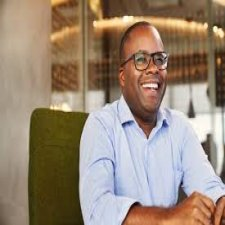

In [4]:


display(Image(filename='p2.jpg'))


# IMG 1 K=3

In [8]:


f1=iteration(3,1,'p2.jpg')   #function calling 
#print(type(f1))


Height of the original image: 225
Width of the original image: 225
(50625, 3)


#### converting 2d to 3D and showing the final picture

3D array f1_3d:


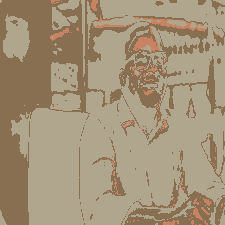

In [9]:
height = 225  
width = 225
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))



# IMG 1 K=10

In [23]:
f1=iteration(10,3,'p2.jpg')   #function calling 
#print(type(f1))


Height of the original image: 225
Width of the original image: 225
(50625, 3)


#### converting 2d to 3D and showing the final picture

3D array f1_3d:


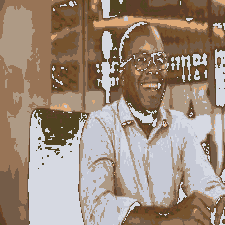

In [24]:
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# IMG 1 K=20

Height of the original image: 225
Width of the original image: 225
(50625, 3)
3D array f1_3d:


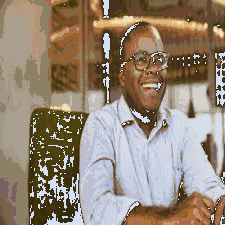

In [36]:
f1=iteration(20,1,'p2.jpg')   #function calling 
#print(type(f1))
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# ORIGNAL IMG 2

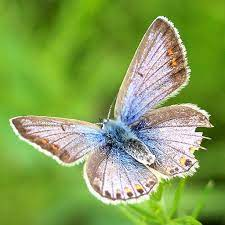

In [10]:
display(Image(filename='img3.jpg'))

# IMG 2 K=3

Height of the original image: 225
Width of the original image: 225
(50625, 3)
3D array f1_3d:


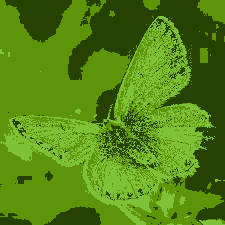

In [11]:
f1=iteration(3,1,'img3.jpg')   #function calling 
#print(type(f1))
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# IMG 2 K=10

Height of the original image: 225
Width of the original image: 225
(50625, 3)
3D array f1_3d:


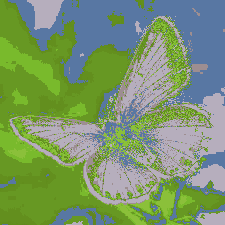

In [12]:
f1=iteration(10,1,'img3.jpg')   #function calling 
#print(type(f1))
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# IMG 2 K=20

Height of the original image: 225
Width of the original image: 225
(50625, 3)
3D array f1_3d:


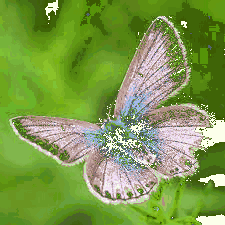

In [37]:
f1=iteration(20,1,'img3.jpg')   #function calling 
#print(type(f1))
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# ORIGNAL IMG 3

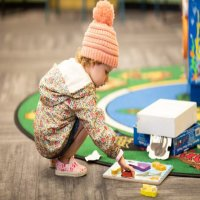

In [14]:
display(Image(filename='final_obj.jpg'))

# IMG 3 K=3

Height of the original image: 200
Width of the original image: 200
(40000, 3)
3D array f1_3d:


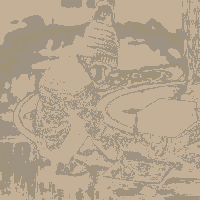

In [38]:
f1=iteration(3,3,'final_obj.jpg')   #function calling 
#print(type(f1))
height=200
width=200
f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# IMG 3 K=10

Height of the original image: 200
Width of the original image: 200
(40000, 3)
3D array f1_3d:


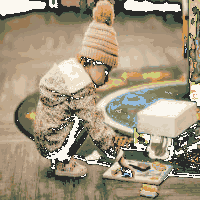

In [40]:
f1=iteration(10,2,'final_obj.jpg')   #function calling 
#print(type(f1))

f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

# IMG 3 K=20

Height of the original image: 200
Width of the original image: 200
(40000, 3)
3D array f1_3d:


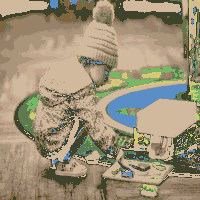

In [17]:
f1=iteration(20,1,'final_obj.jpg')   #function calling 
#print(type(f1))

f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png'))

Height of the original image: 200
Width of the original image: 200
(40000, 3)
3D array f1_3d:


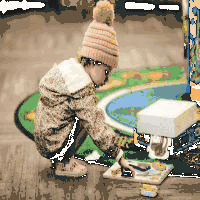

In [42]:
f1=iteration(70,2,'final_obj.jpg')   #function calling 
#print(type(f1))

f1_3d = f1.reshape((height, width, 3))

print("3D array f1_3d:")
f1_image = np.uint8(f1_3d)
cv2.imwrite("f2_image.png", f1_image)
loaded_image = cv2.imread("f2_image.png")
cv2.imshow("Loaded Image", loaded_image)
display(Image(filename='f2_image.png')) 

So when no of cluster changing the output img is changing accordingly. As At start Random centroid is being selected so sometimes on k let say k=20 it gives very good clr sometimes not so some time we need to change no of iteration (as stoping creiteria ) is defined by me. Sometime on k=10 ,20 it gives just OK img then as I increased no of cluster it has now more margin to group the point near good centroid as in 2nd last cell k =70.